<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/CNN/Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inception Model

https://www.tensorflow.org/tutorials/image_recognition

https://arxiv.org/abs/1512.00567

In [0]:
#from google.colab import files
#files.upload()
#!mkdir images
#!cp *.jpg images

## carregando os arquivos

In [24]:
!rm *.pb
!rm 'classify_image_graph_def.pb?raw=true'

rm: cannot remove '*.pb': No such file or directory


In [25]:
!ls

beyonce.jpg.1	    car.jpeg.1	   download.py	    sample_data
boqueirao-01.jpg.1  checkpoints    images	    tf
boqueirao-01.jpg.2  cifar10.py	   medicine.jpeg.1  wine.jpeg.1
bridge.jpg.1	    couple.jpeg.1  notebook.jpeg.1
bridge.jpg.2	    data	   papa.jpeg.1
cache.py	    dataset.py	   __pycache__


In [26]:
!wget https://github.com/taey16/tf/raw/master/imagenet/classify_image_graph_def.pb
!ls -ilah

--2019-01-20 18:11:10--  https://github.com/taey16/tf/raw/master/imagenet/classify_image_graph_def.pb
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/taey16/tf/master/imagenet/classify_image_graph_def.pb [following]
--2019-01-20 18:11:10--  https://raw.githubusercontent.com/taey16/tf/master/imagenet/classify_image_graph_def.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95673916 (91M) [application/octet-stream]
Saving to: ‘classify_image_graph_def.pb’

classify_image_grap 100%[===================>]  91.24M   118MB/s    in 0.8s    

2019-01-20 18:11:11 (118 MB/s) - ‘classify_im

In [31]:
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/inception.py
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/cache.py
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/download.py

--2019-01-20 18:14:34--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/inception.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21604 (21K) [text/plain]
Saving to: ‘inception.py’

inception.py        100%[===================>]  21.10K  --.-KB/s    in 0.01s   

2019-01-20 18:14:34 (2.13 MB/s) - ‘inception.py’ saved [21604/21604]

--2019-01-20 18:14:35--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/cache.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [27]:
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/images/inception_flowchart.png
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/boqueirao-01.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/bridge.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/car.jpeg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/couple.jpeg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/medicine.jpeg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/notebook.jpeg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/wine.jpeg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/beyonce.jpg  
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/papa.jpeg  
!mkdir images  
!mv *.jpg images
!mv *.jpeg images
!mv *.png images

--2019-01-20 18:11:25--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/images/inception_flowchart.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346842 (339K) [image/png]
Saving to: ‘inception_flowchart.png’

inception_flowchart 100%[===================>] 338.71K  --.-KB/s    in 0.04s   

2019-01-20 18:11:26 (7.79 MB/s) - ‘inception_flowchart.png’ saved [346842/346842]

--2019-01-20 18:11:27--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/boqueirao-01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP

In [44]:
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/jacare.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/cat01.jpg  
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/cat02.jpeg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/dog01.jpg  
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/dog02.jpg  
!mv *.jpg images
!mv *.jpeg images

--2019-01-20 18:25:25--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/jacare.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137614 (134K) [image/jpeg]
Saving to: ‘jacare.jpg’

jacare.jpg          100%[===================>] 134.39K  --.-KB/s    in 0.03s   

2019-01-20 18:25:25 (4.13 MB/s) - ‘jacare.jpg’ saved [137614/137614]

--2019-01-20 18:25:26--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/cat01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response...

In [57]:
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/beyonce02.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/tiririca.jpg
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/winderson-nunes.jpg  
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/rihanna01.jpg  
!wget https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/rihanna02.jpg  
!mv *.jpg images

--2019-01-20 18:43:31--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/beyonce02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166536 (163K) [image/jpeg]
Saving to: ‘beyonce02.jpg’

beyonce02.jpg       100%[===================>] 162.63K  --.-KB/s    in 0.03s   

2019-01-20 18:43:31 (5.37 MB/s) - ‘beyonce02.jpg’ saved [166536/166536]

--2019-01-20 18:43:32--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/CNN/inception/images/tiririca.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting

## Introdução

Este jupyter notebook mostra como usar uma rede Deep Neural Convolucional pré-treinada chamada Inception v3 para classificação de imagem.

O modelo Inception v3 leva semanas para treinar em um super computador com 8 GPUs Tesla K40 que provavelmente custa US$ 30.000 por isso é impossível treiná-lo em um PC comum. Em vez disso, baixaremos o modelo pré-treinado do Inception e usamos para classificar imagens. Usaremos o super computador da DSA e recomendamos que você faça o mesmo.

O modelo Inception v3 tem quase 25 milhões de parâmetros e usa 5 bilhões de operações de multiplicação para classificar uma única imagem. Em um PC moderno sem GPU isso pode ser feito em uma fração de segundo por imagem.

Os detalhes da implementação estão no arquivo inception.py que você encontra em anexo.

In [28]:
# Verificano se a GPU tem memória disponível
!nvidia-smi

Sun Jan 20 18:11:51 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Flowchart

O diagrama a seguir mostra como os dados circulam no modelo Inception v3, que é uma Rede Neural Convolucional com muitas camadas e uma estrutura complicada. O [documento de pesquisa] (http://arxiv.org/pdf/1512.00567v3.pdf) fornece mais detalhes sobre como o modelo Inception foi construído e por que ele foi projetado desse jeito. Mas os autores admitem que eles não entendem por que funciona.

Observe que o modelo Inception tem duas saídas softmax. Um é usado durante o treinamento da rede neural e o outro é usado para classificar imagens após a conclusão do treinamento, também conhecido como inferência.

[Novos modelos] (https://research.googleblog.com/2016/08/improving-inception-and-image.html) ficaram disponíveis recentemente, e são ainda mais complicados do que o Inception v3 e conseguem uma precisão de classificação um pouco melhor.

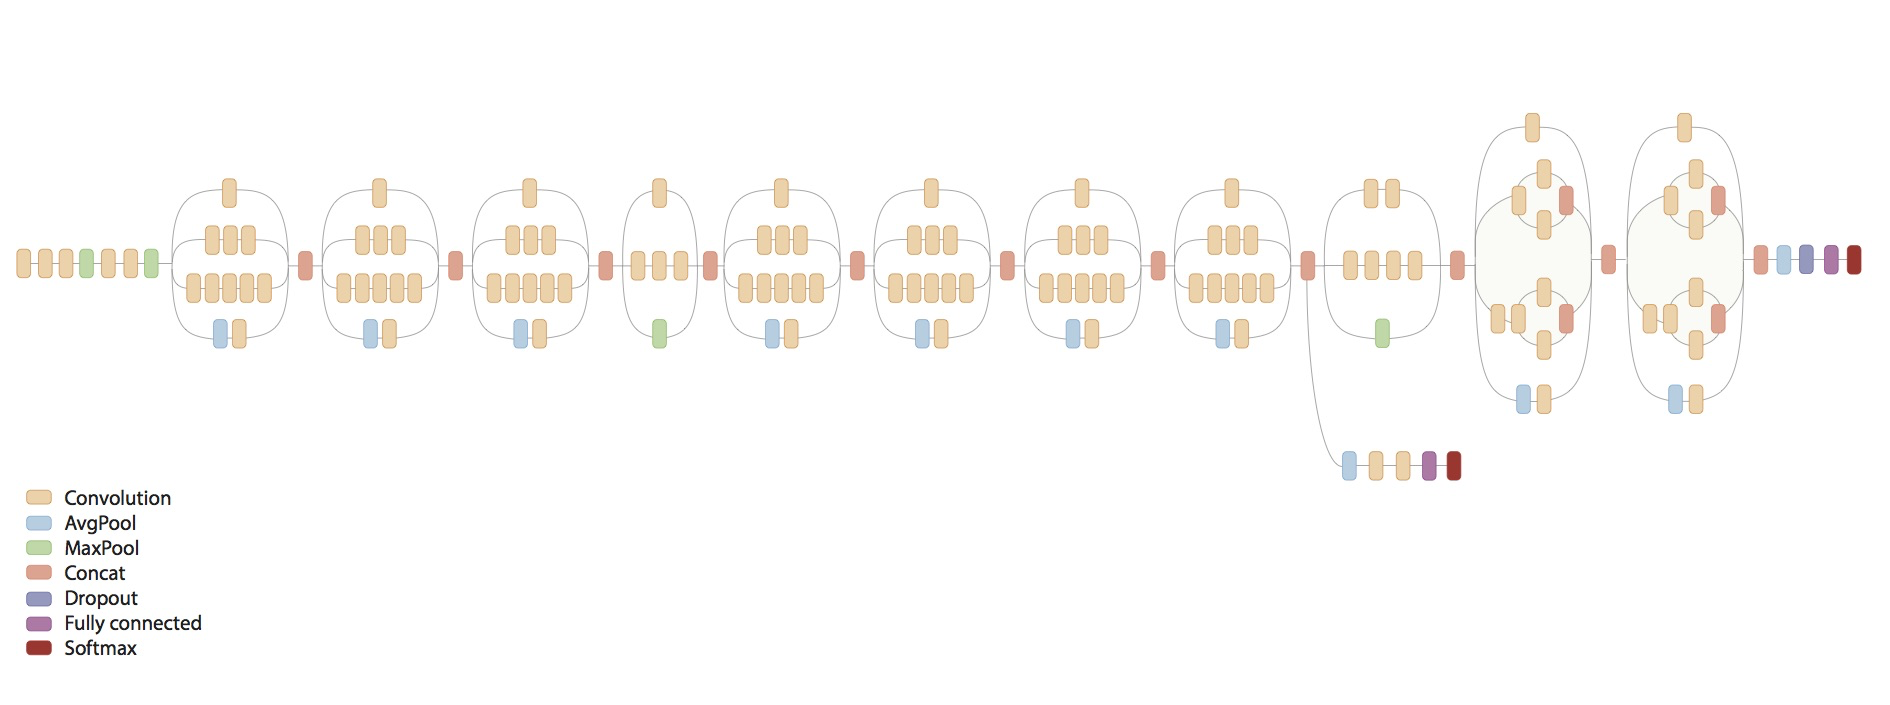

In [29]:
from IPython.display import Image, display
Image('images/inception_flowchart.png')

## Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

# Funções e Classes para o Inception model.
import inception

Usamos Python 3.6 com TensorFlow:

In [33]:
tf.__version__

'1.7.0'

## Download do Inception Model

O modelo Inception é baixado da internet. Download dos dados para o modelo Inception se ele ainda não existir no diretório. São 85 MB.

In [34]:
inception.maybe_download()

- Download em andamento: 100.0%
Download concluído. Extraindo os arquivos.
Feito.


## Carregando o Inception Model

Carregando o modelo Inception para que esteja pronto para classificar imagens. Observe o aviso de warning, que pode fazer com que o programa falhe no futuro.

In [0]:
model = inception.Inception()

In [36]:
model

## Função Para Classificar e Plotar Imagens

In [0]:
def classify(image_path):
    display(Image(image_path))

    pred = model.classify(image_path=image_path)

    model.print_scores(pred=pred, k=10, only_first_name=True)    

## Carro Mini-SUV

Esta imagem de um carro está incluída no arquivo de dados do Inception Model.
O modelo Inception está bastante confiante de que esta imagem mostra um carro, com uma pontuação de classificação de 87.73% e a próxima pontuação mais alta sendo apenas 1.17% para um carrinho de praia.

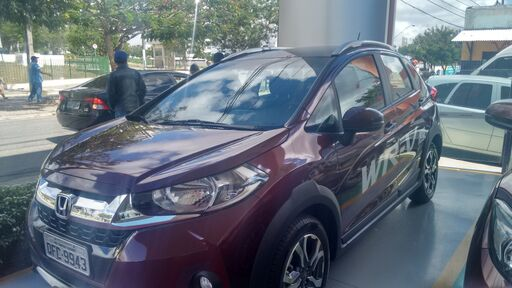

87.73% : minivan
 1.17% : beach wagon
 0.96% : limousine
 0.93% : gas pump
 0.47% : motor scooter
 0.44% : car mirror
 0.39% : grille
 0.27% : moped
 0.26% : car wheel
 0.24% : parking meter


In [43]:
#image_path = os.path.join(inception.data_dir, 'cropped_panda.jpg')
image_path = 'images/' + 'car.jpeg'
classify(image_path)

## Interpretação dos Scores de Classificações 

A saída do modelo Inception é a denominada função Softmax, que também foi usada nas redes neurais que construímos anteriormente.

As saídas de softmax às vezes são chamadas de probabilidades porque estão entre zero e um, e também somam um, exatamente como probabilidades. Mas eles na verdade não são probabilidades no sentido tradicional da palavra, porque não provêm de experiências repetidas.

Talvez seja melhor chamar os valores de saída de uma rede neural para classificação de scores ou ranks, porque indicam quão fortemente a rede acredita que a imagem de entrada é de cada classe possível.

No exemplo acima, com a imagem de um panda, o modelo Inception deu uma pontuação muito alta de 89,23% para a classe panda, e as pontuações para as restantes 999 classes possíveis estavam abaixo de 1%. Isso significa que o modelo do Inception tem certeza de que a imagem mostrou um panda e os escores restantes abaixo de 1% devem ser considerados como ruído. Por exemplo, a 10ª pontuação mais alta foi 0,05% para um relógio digital, mas isso provavelmente é mais devido à natureza imprecisa das redes neurais, em vez de uma indicação de que a imagem parecia um pouco como um relógio digital.

Às vezes, o modelo Inception fica confuso sobre a qual classe pertence uma imagem, de modo que nenhuma das pontuações é realmente alta. Exemplos disso são mostrados abaixo.

## Cachorro 

O modelo Inception está muito confiante (pontuação 79.76%) que esta imagem mostra umq raça de cachoro chamada de golden retriever

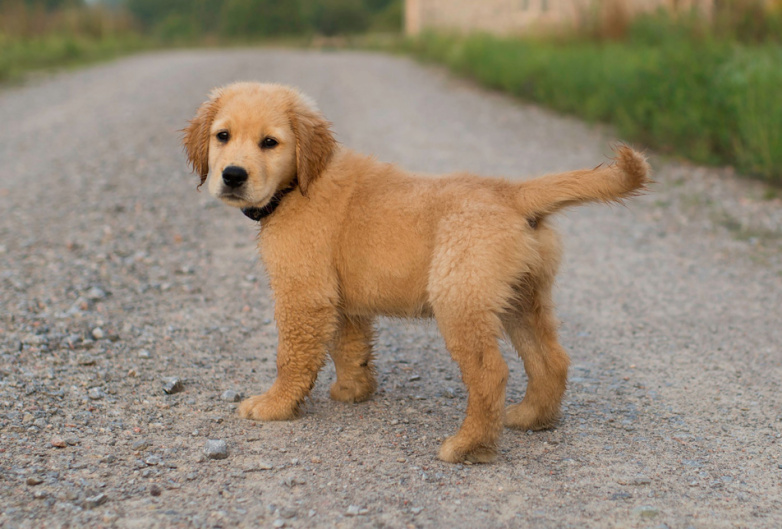

79.76% : golden retriever
 2.21% : kuvasz
 1.32% : standard poodle
 0.95% : Labrador retriever
 0.76% : curly-coated retriever
 0.69% : miniature poodle
 0.20% : corn
 0.20% : toy poodle
 0.18% : ear
 0.16% : flat-coated retriever


In [50]:
classify(image_path = "images/dog02.jpg")

## Pessoa

*Esta* imagem não classificou como pessoa, devido ao modelo não ter sido treinado para classificar pessoas, mas o modelo classificou como gravata (50.57%) e terno (19.15%),


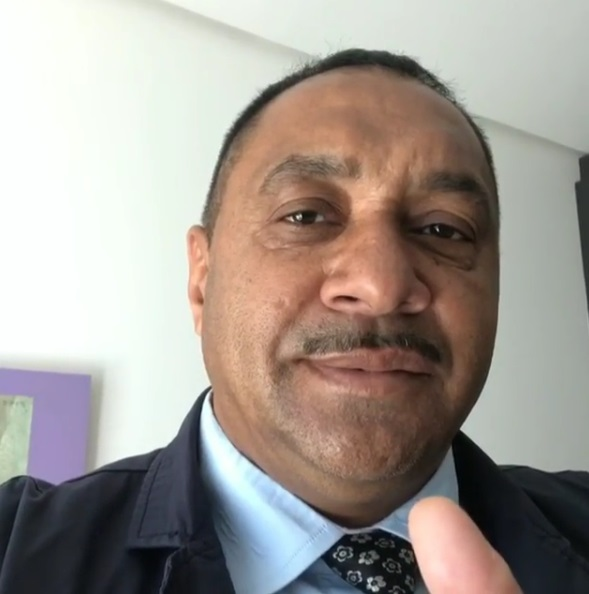

50.57% : Windsor tie
19.15% : suit
10.63% : bow tie
 0.61% : academic gown
 0.43% : bolo tie
 0.42% : oboe
 0.28% : mortarboard
 0.25% : bassoon
 0.21% : groom
 0.17% : cornet


In [60]:
classify(image_path="images/tiririca.jpg")

## Pessoa

Esta imagem de pessoa foi classificada com 29.58% de acurácia de ser uma toalha de banho.


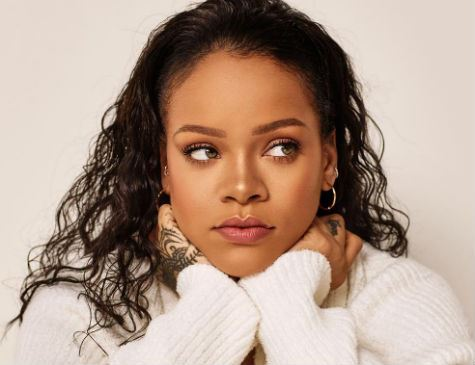

29.58% : bath towel
11.46% : cardigan
10.43% : poncho
 8.33% : stole
 8.03% : wool
 3.45% : pajama
 3.44% : fur coat
 1.14% : mitten
 0.77% : sweatshirt
 0.49% : face powder


In [64]:
classify(image_path="images/rihanna02.jpg")

## Gato

O modelo Inception classificou a imagem com gato egípico com 30.06% e 6.63% como toalha de banho.


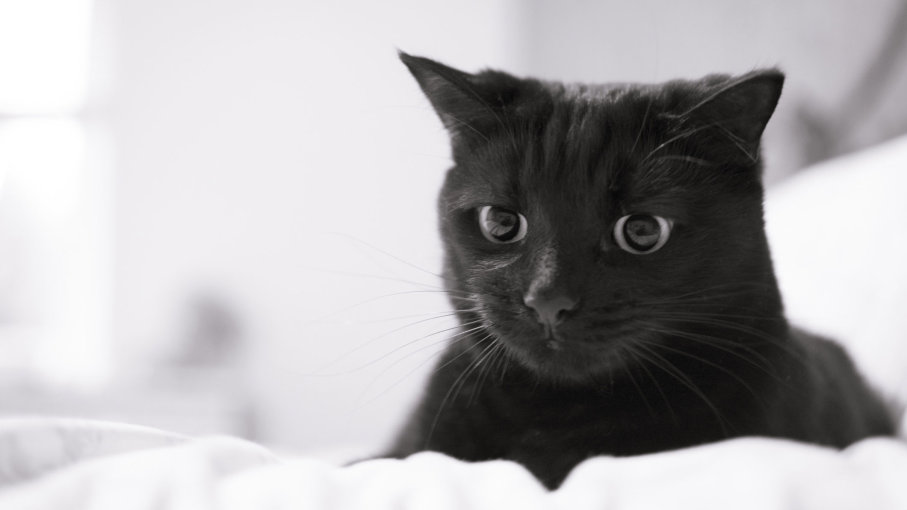

30.06% : Egyptian cat
 6.63% : bath towel
 6.57% : tabby
 5.90% : radiator
 3.96% : quilt
 2.97% : tiger cat
 1.91% : computer keyboard
 1.66% : carton
 1.42% : Siamese cat
 1.42% : paper towel


In [67]:
classify(image_path="images/cat01.jpg")

## Notebook

O modelo classificou a imagem com 30.23% de probabilidade de ser um notebook e com
29.18% de probabilidade de ser um teclado.


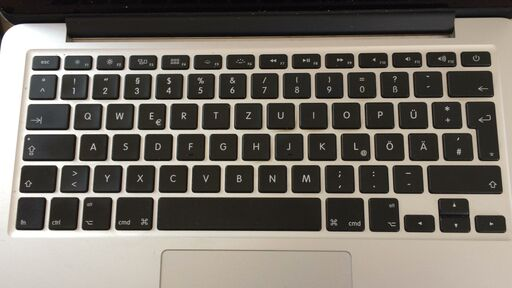

30.23% : notebook
29.18% : computer keyboard
27.40% : space bar
 3.76% : laptop
 2.29% : typewriter keyboard
 0.57% : mouse
 0.17% : iPod
 0.10% : hand-held computer
 0.08% : modem
 0.08% : loupe


In [69]:
classify(image_path="images/notebook.jpeg")

## Vinho

O modelo do Inception classificou a imagem com 66.09% de probabilidade de ser vinho, e com 
13.04% de ser uma taça ou cálice.


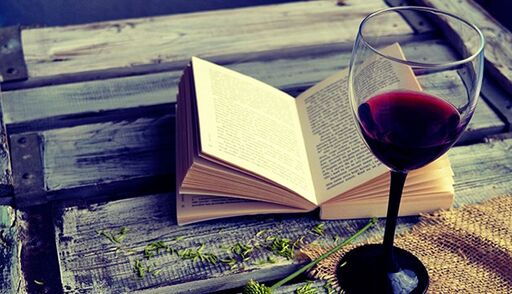

66.09% : red wine
13.04% : goblet
 2.77% : wine bottle
 0.22% : envelope
 0.22% : strainer
 0.19% : beer glass
 0.17% : hourglass
 0.11% : balloon
 0.11% : corkscrew
 0.11% : window shade


In [73]:
classify(image_path="images/wine.jpeg")

## Medicamento

O modelo inception ficou confuso com a caixa de comprimidos, só estimando em 2.17% a sua probabilidade (muito baixa), e classificando com probabilidade bem mais alta a imagem como protetor solar.

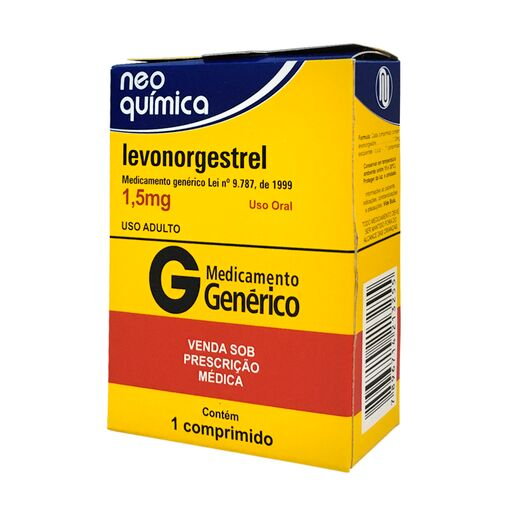

34.41% : oil filter
12.03% : sunscreen
11.91% : carton
 2.92% : Band Aid
 2.77% : packet
 2.54% : eggnog
 2.17% : pill bottle
 1.44% : hard disc
 1.09% : mousetrap
 1.05% : paintbrush


In [71]:
classify(image_path="images/medicine.jpeg")

## Jacaré

*O* modelo de Inception estimou em 98.29% a imagem como um Jacaré.

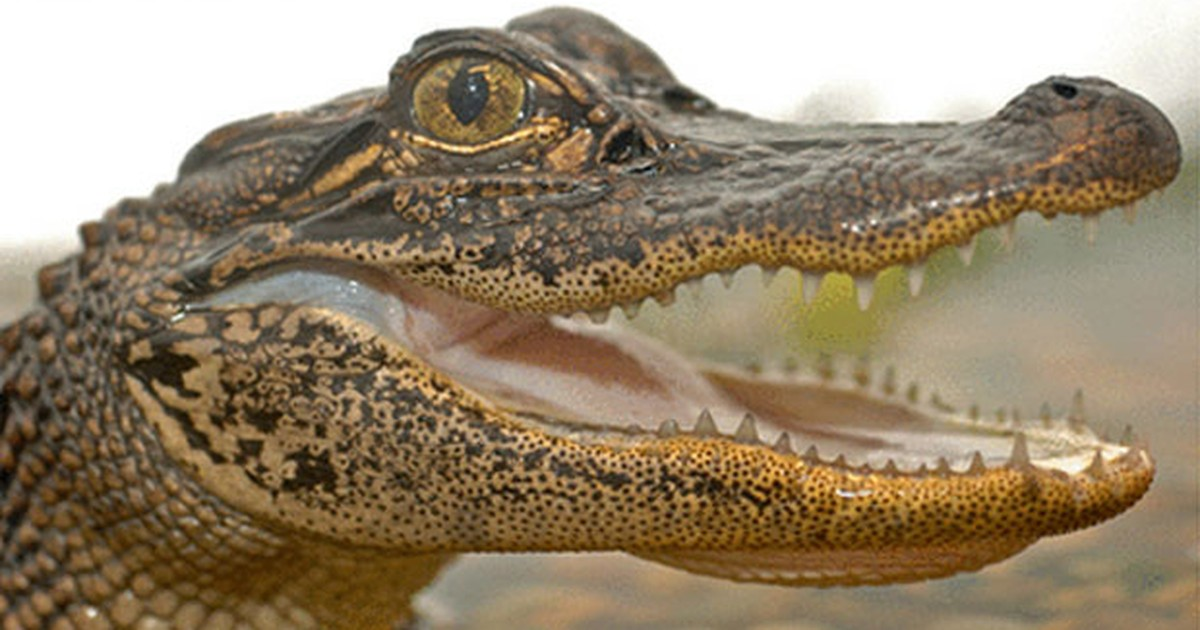

98.29% : American alligator
 0.50% : African crocodile
 0.01% : mud turtle
 0.01% : alligator lizard
 0.01% : castle
 0.01% : abacus
 0.01% : red wolf
 0.01% : hippopotamus
 0.01% : Australian terrier
 0.01% : shoe shop


In [75]:
classify(image_path="images/jacare.jpg")

## Ponte

A imagem foi classificada com 74.16%  de probalidade de ser um "pier" e com  10.25% de probabilidade de ser uma ponte.

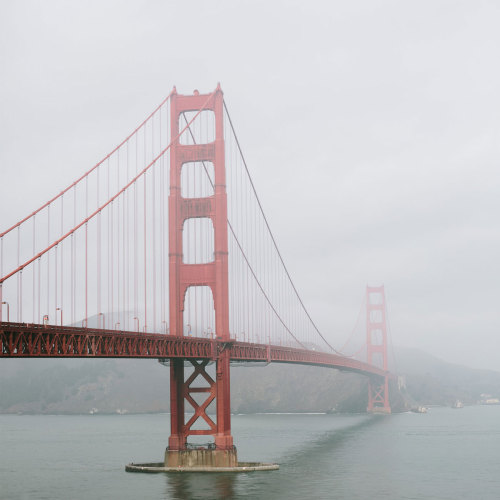

74.16% : pier
10.25% : suspension bridge
 2.72% : container ship
 1.99% : fireboat
 0.68% : promontory
 0.48% : steel arch bridge
 0.19% : liner
 0.15% : hatchet
 0.14% : airship
 0.09% : drilling platform


In [76]:
classify(image_path="images/bridge.jpg")

## Classficando outras imagens

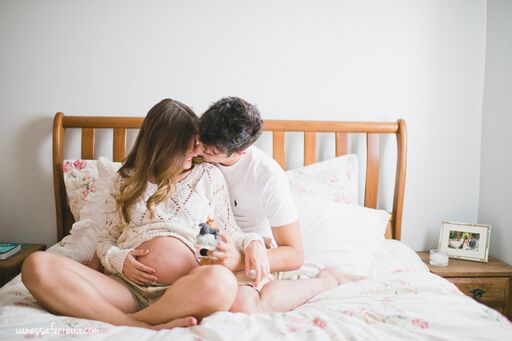

20.93% : crib
13.75% : studio couch
11.71% : quilt
 9.20% : pajama
 1.20% : four-poster
 1.19% : Band Aid
 0.95% : rocking chair
 0.95% : jean
 0.91% : diaper
 0.85% : miniskirt





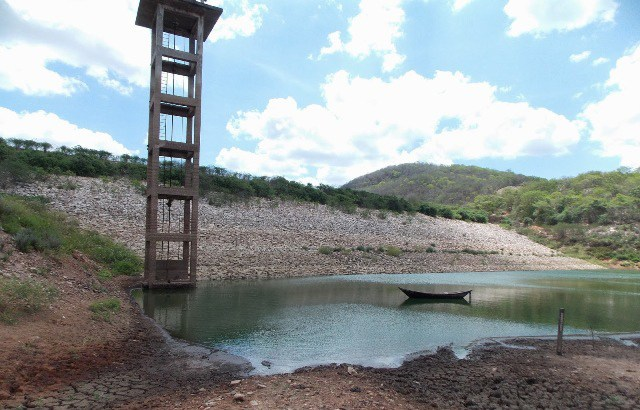

27.53% : bell cote
 6.74% : dam
 6.21% : sandbar
 5.13% : lakeside
 5.07% : valley
 3.85% : suspension bridge
 1.68% : seashore
 1.04% : promontory
 0.94% : breakwater
 0.66% : beacon





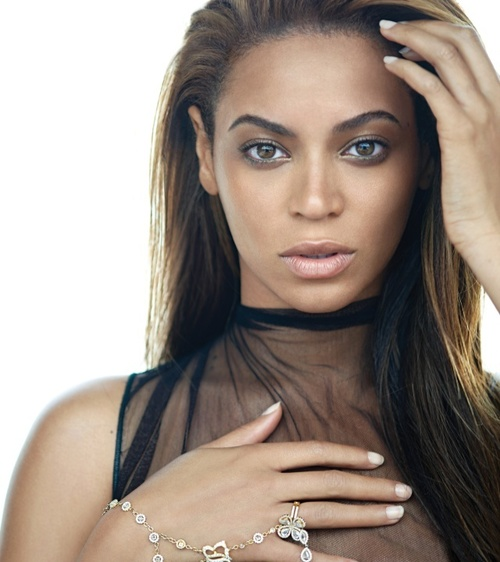

23.65% : bikini
15.70% : perfume
14.51% : hair slide
 6.94% : hair spray
 5.06% : sunscreen
 4.06% : Band Aid
 3.39% : lotion
 3.33% : brassiere
 3.30% : abaya
 1.52% : face powder





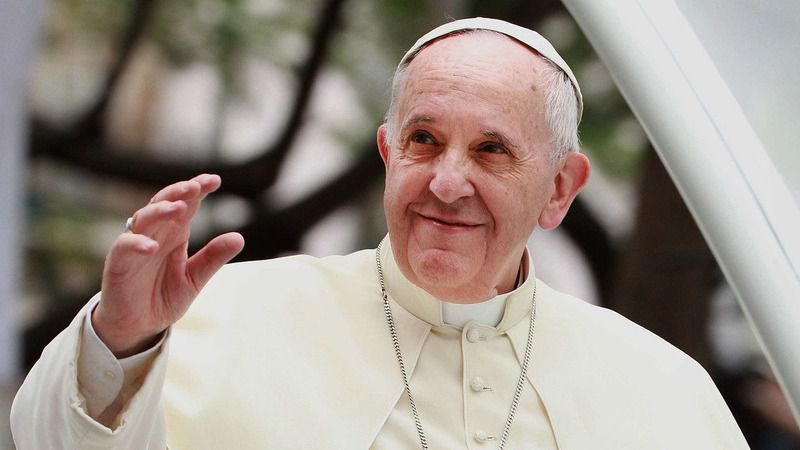

70.23% : vestment
 8.57% : bolo tie
 3.05% : poncho
 1.58% : necklace
 0.92% : chain
 0.67% : jersey
 0.46% : cowboy hat
 0.45% : cloak
 0.45% : sweatshirt
 0.31% : chain mail





In [89]:
images = [
'couple.jpeg', # sofá, berço
'boqueirao-01.jpg',    
'beyonce.jpg',     
'papa.jpeg'
]

image_path="images/"
for img in images:
    classify(image_path + img)
    print('\n\n')

## # Carregando arquivos de uma pasta e classificando todos os arquivos

In [103]:
!rm *.jpg
!rm *.jpeg
!rm *.png
!rm -rf images2

rm: cannot remove '*.jpg': No such file or directory
rm: cannot remove '*.jpeg': No such file or directory
rm: cannot remove '*.png': No such file or directory


In [105]:
from google.colab import files
files.upload()
!mkdir images2
!mv *.jpg images2
!mv *.jpeg images2
!mv *.png images2

Saving dog.jpg to dog.jpg
Saving farm.jpeg to farm.jpeg
Saving roses02.jpeg to roses02.jpeg
Saving couple02.jpeg to couple02.jpeg
Saving roses.jpeg to roses.jpeg
Saving carr.jpeg to carr.jpeg
Saving Funny-01.jpg to Funny-01.jpg
Saving tumblr_oh06cxt3EL1u7nll5o1_500.jpg to tumblr_oh06cxt3EL1u7nll5o1_500.jpg
Saving baiaformosa03.jpg to baiaformosa03.jpg
Saving baiaformosa02.jpg to baiaformosa02.jpg
Saving baiaformosa01.jpg to baiaformosa01.jpg
Saving parrot.jpg to parrot.jpg
Saving cropped_panda.jpg to cropped_panda.jpg
mv: cannot stat '*.png': No such file or directory


In [106]:
!ls images2

baiaformosa01.jpg  cropped_panda.jpg  roses02.jpeg
baiaformosa02.jpg  dog.jpg	      roses.jpeg
baiaformosa03.jpg  farm.jpeg	      tumblr_oh06cxt3EL1u7nll5o1_500.jpg
carr.jpeg	   Funny-01.jpg
couple02.jpeg	   parrot.jpg


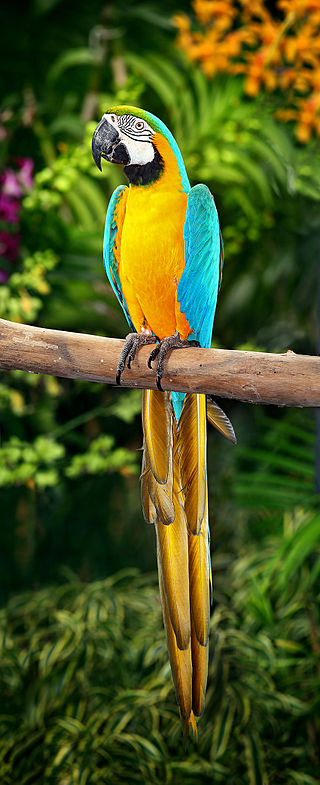

97.18% : macaw
 0.07% : African grey
 0.06% : toucan
 0.05% : jacamar
 0.04% : bee eater
 0.03% : lorikeet
 0.02% : sulphur-crested cockatoo
 0.02% : jay
 0.01% : kite
 0.01% : indigo bunting





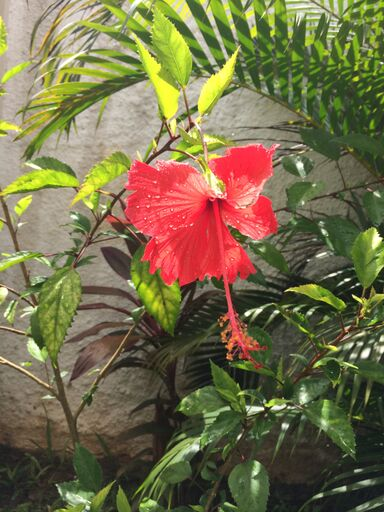

45.68% : pot
27.00% : greenhouse
 6.99% : picket fence
 1.87% : hummingbird
 0.98% : chainlink fence
 0.81% : brass
 0.67% : tile roof
 0.49% : doormat
 0.46% : vase
 0.44% : birdhouse





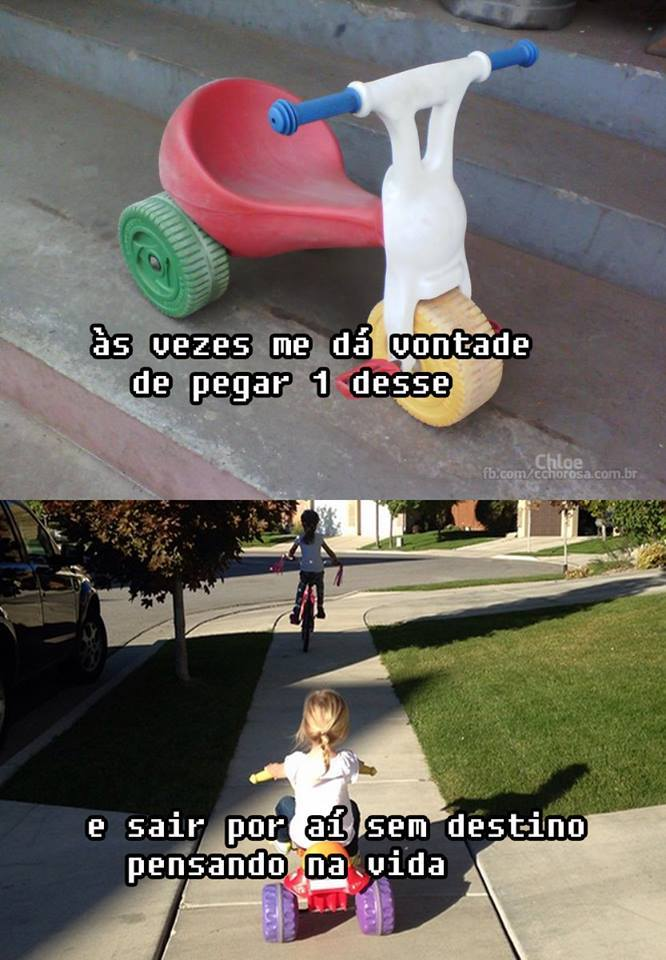

19.93% : tricycle
 5.61% : swing
 4.08% : clog
 3.62% : cowboy hat
 2.50% : park bench
 1.29% : unicycle
 1.17% : toyshop
 1.01% : web site
 0.86% : library
 0.86% : bicycle-built-for-two





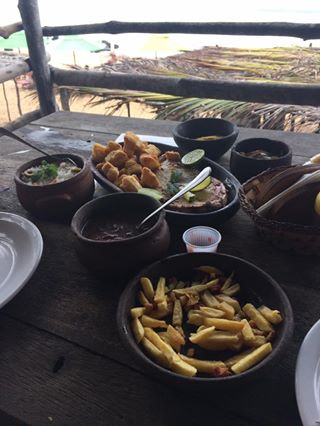

21.18% : restaurant
19.65% : plate
 9.89% : wok
 6.34% : frying pan
 4.99% : dining table
 3.82% : tray
 2.23% : pot
 2.23% : grocery store
 1.53% : banana
 1.39% : hot pot





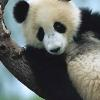

89.11% : giant panda
 0.78% : indri
 0.30% : lesser panda
 0.15% : custard apple
 0.12% : earthstar
 0.09% : sea urchin
 0.05% : forklift
 0.05% : digital watch
 0.05% : gibbon
 0.05% : go-kart





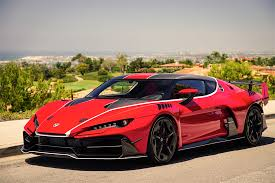

37.77% : sports car
15.27% : convertible
 7.98% : racer
 2.17% : car wheel
 0.42% : go-kart
 0.35% : pickup
 0.33% : amphibian
 0.29% : passenger car
 0.16% : grille
 0.13% : space bar





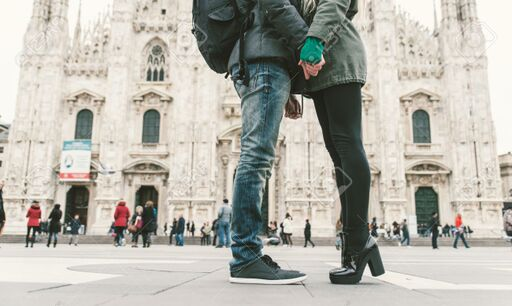

32.08% : triumphal arch
20.01% : pedestal
14.93% : palace
 2.23% : obelisk
 1.83% : monastery
 1.83% : vault
 1.19% : jean
 0.80% : fountain
 0.64% : brass
 0.60% : sundial





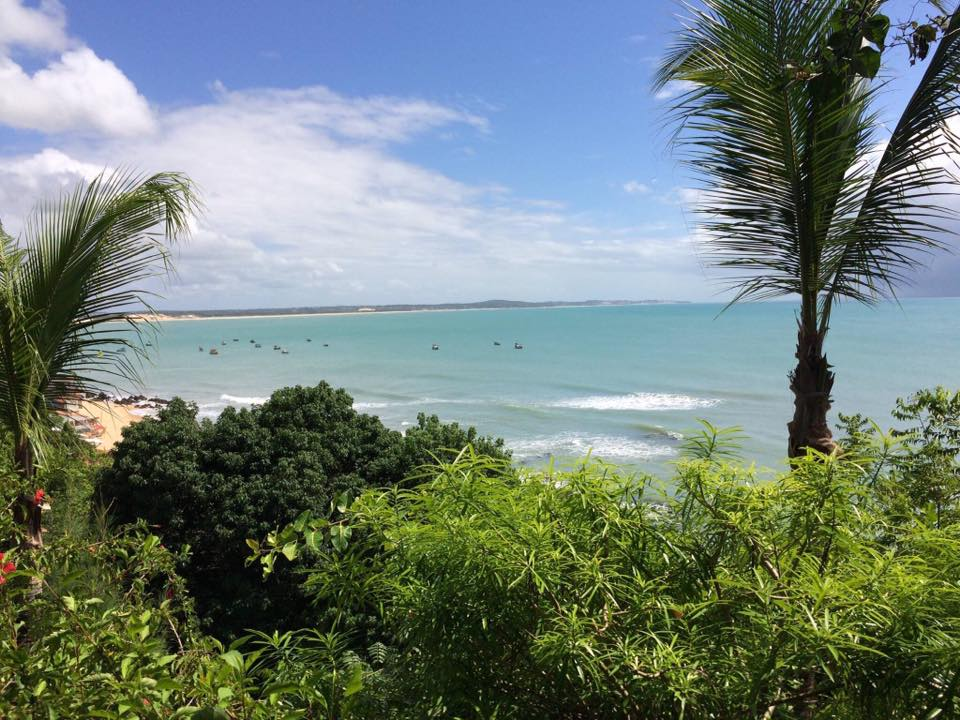

58.87% : seashore
24.01% : lakeside
 6.94% : promontory
 1.29% : sandbar
 0.77% : patio
 0.45% : coral reef
 0.18% : valley
 0.14% : cliff
 0.13% : pineapple
 0.12% : beacon





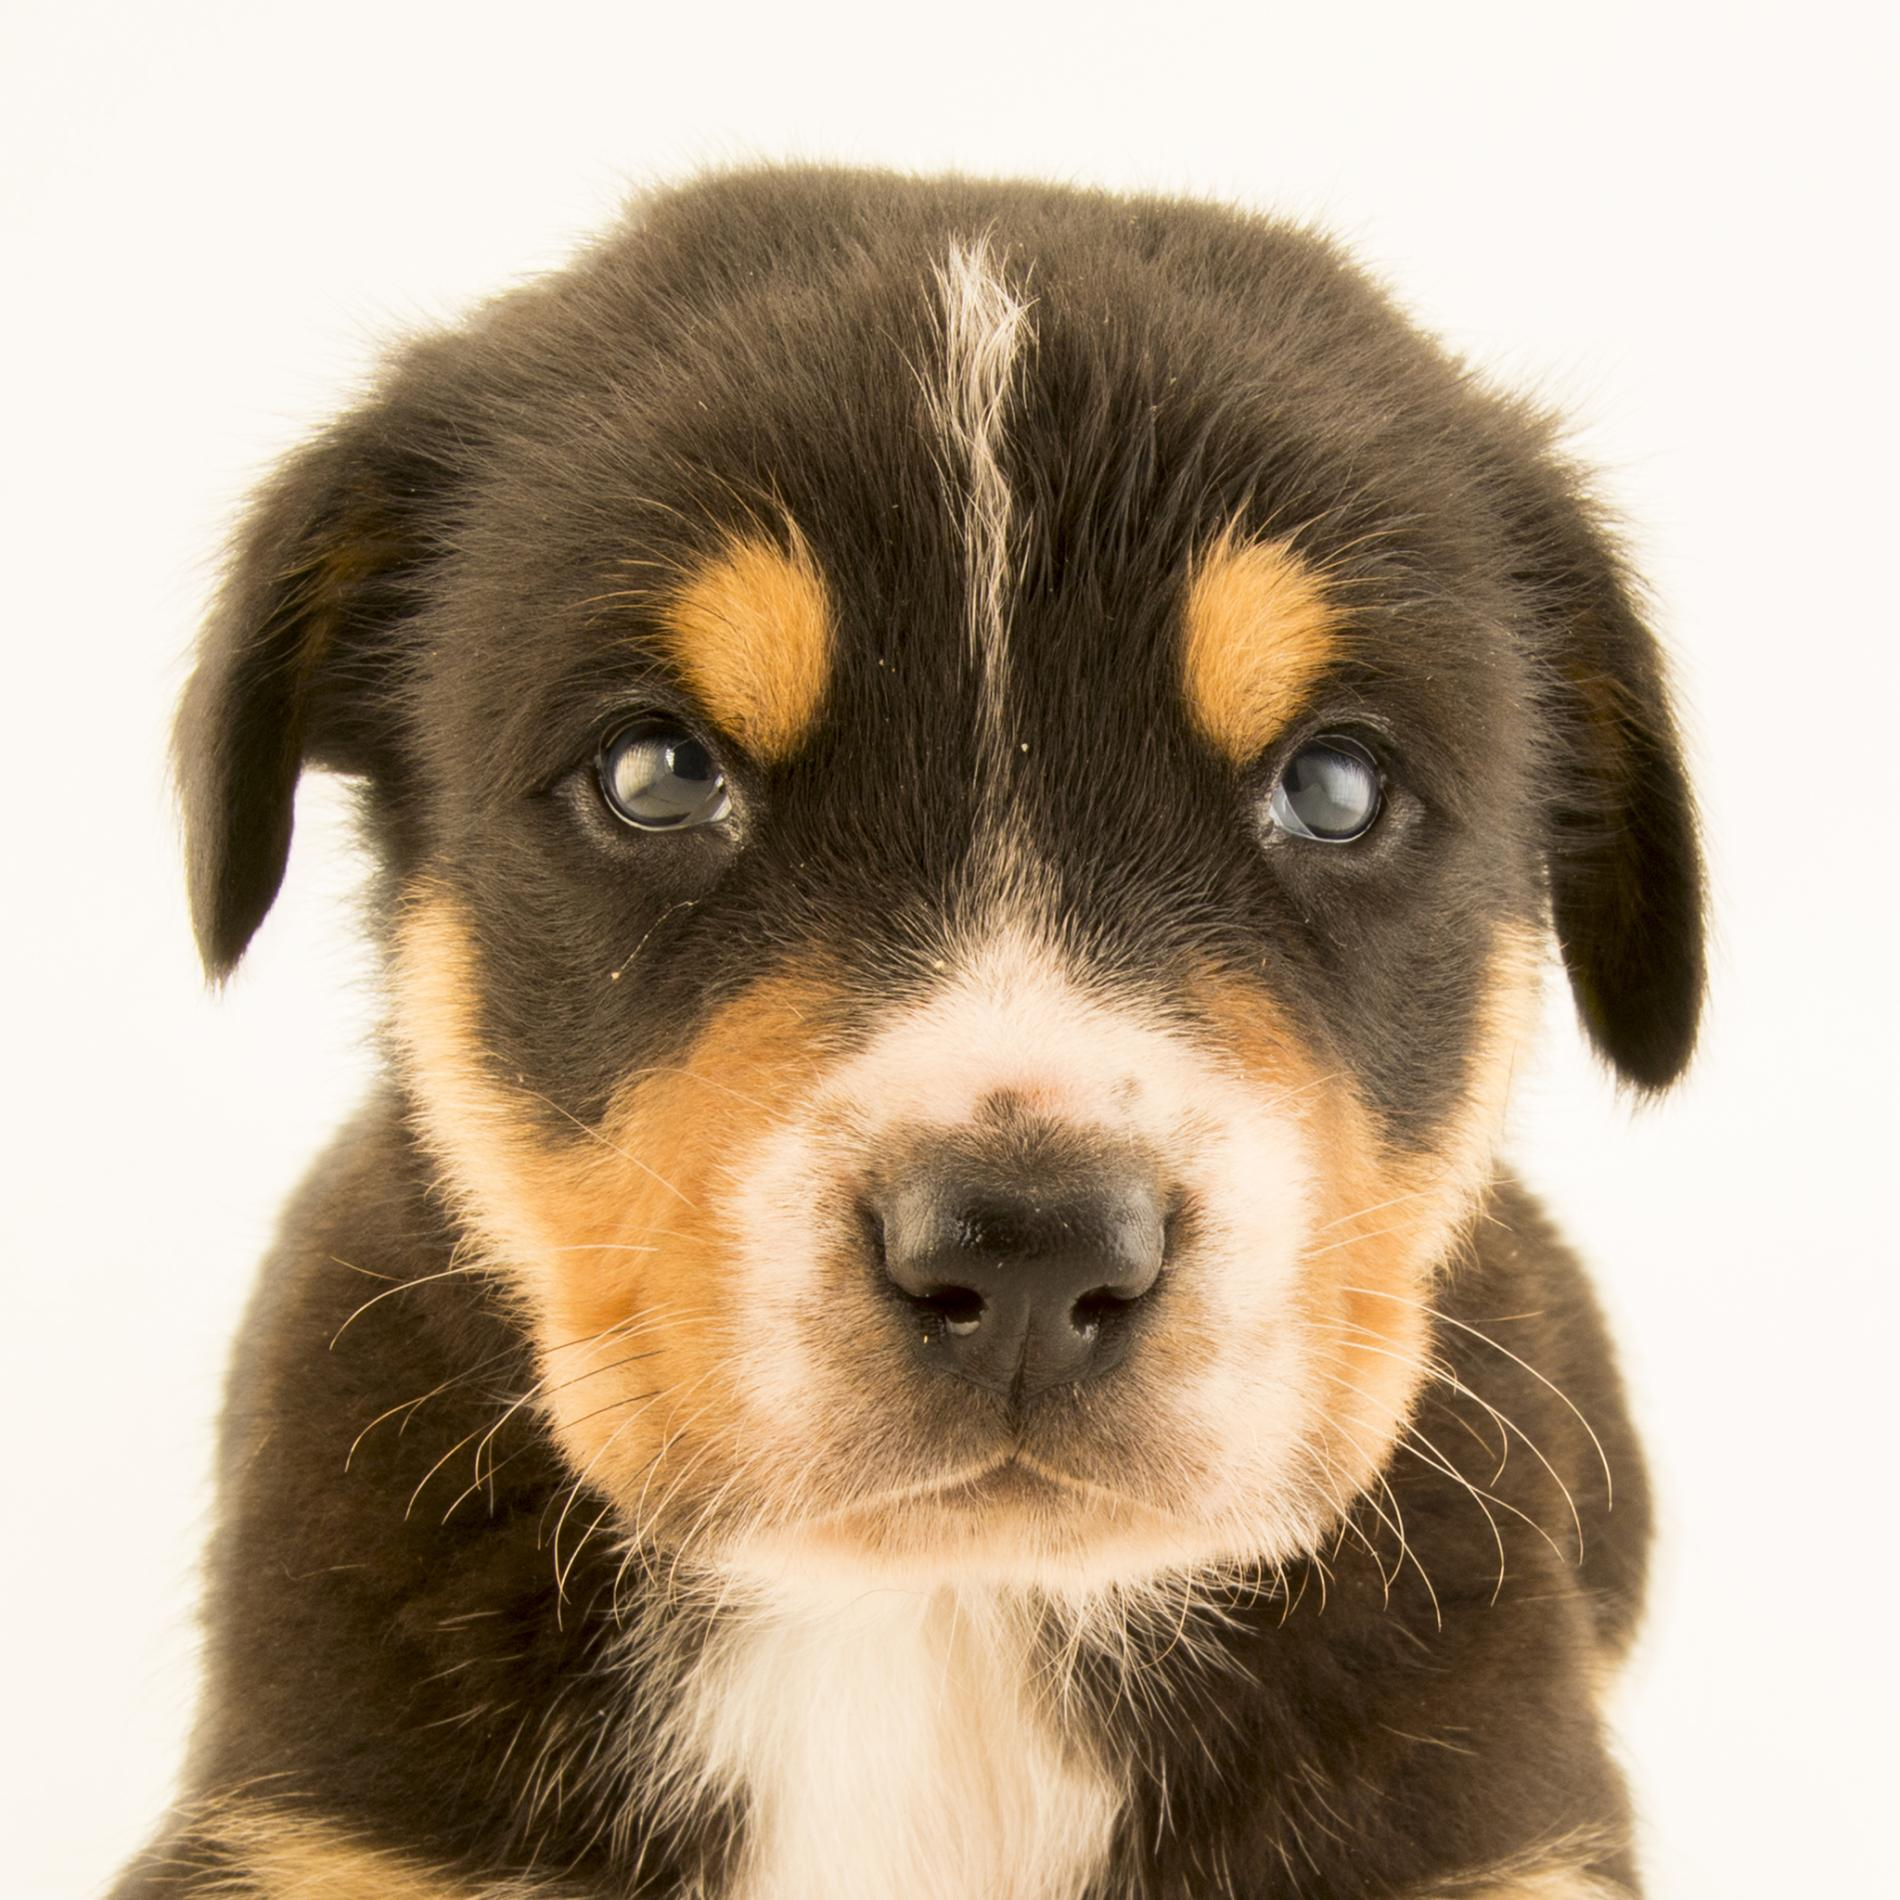

54.47% : Appenzeller
13.84% : EntleBucher
12.38% : Rottweiler
 2.73% : Greater Swiss Mountain dog
 0.94% : basenji
 0.51% : kelpie
 0.21% : Doberman
 0.20% : Bernese mountain dog
 0.20% : American Staffordshire terrier
 0.18% : Eskimo dog





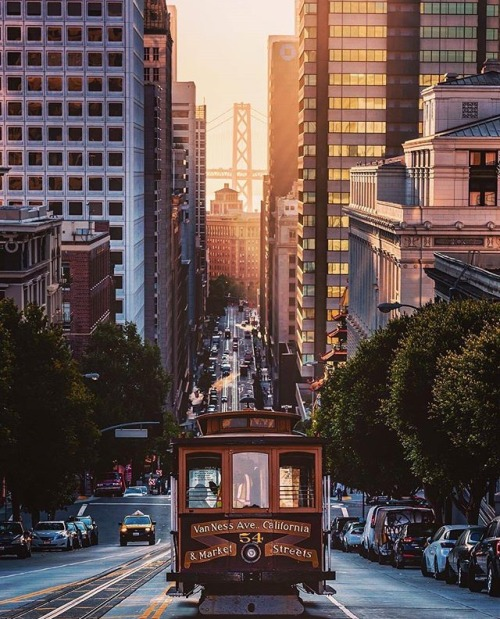

94.38% : streetcar
 0.58% : trolleybus
 0.36% : cab
 0.33% : minibus
 0.27% : school bus
 0.16% : carousel
 0.10% : crane
 0.09% : electric locomotive
 0.09% : passenger car
 0.09% : pier





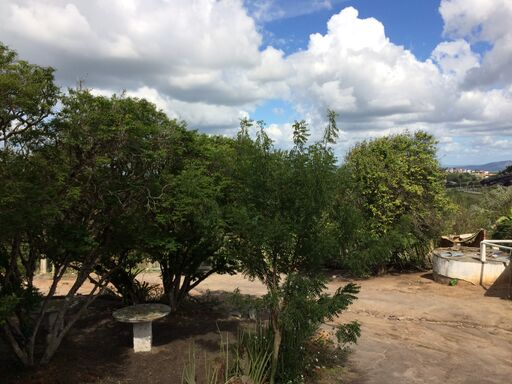

15.23% : patio
15.06% : tub
13.84% : pot
13.49% : seashore
 9.27% : lakeside
 6.01% : bathtub
 3.41% : apiary
 1.37% : valley
 0.68% : promontory
 0.67% : toilet seat





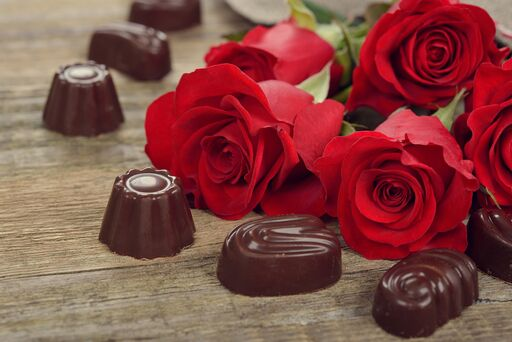

94.93% : thimble
 0.50% : vase
 0.40% : candle
 0.34% : saltshaker
 0.31% : velvet
 0.20% : quill
 0.17% : bakery
 0.13% : oil filter
 0.12% : confectionery
 0.09% : croquet ball





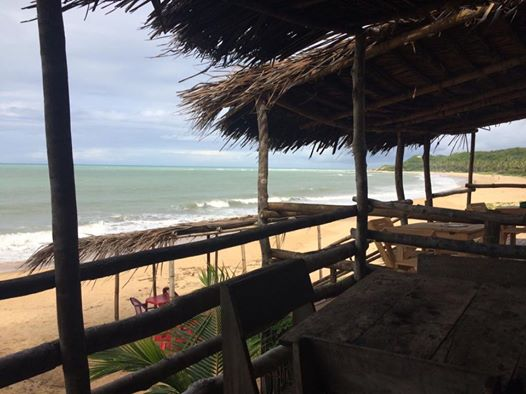

60.00% : thatch
25.57% : seashore
 5.54% : sandbar
 2.70% : restaurant
 1.97% : patio
 0.48% : sarong
 0.41% : sunscreen
 0.39% : promontory
 0.12% : lakeside
 0.10% : oxcart





In [107]:
import os
image_path="images2/"
files = os.listdir(image_path)
for img in files:
    classify(image_path + img)
    print('\n\n')

## Encerrando a Sessão TensorFlow

In [0]:
model.close()

## Conclusão

Este jupyter notebook mostrou como usar o modelo pré-treinado Inception v3. Demora várias semanas para um monster-computer treinar o modelo Inception, mas podemos simplesmente baixar o modelo final da internet e usá-lo em um PC normal para classificar imagens.

Infelizmente, o modelo de Inception parece ter problemas para reconhecer as pessoas. Isso pode ser devido ao conjunto de treinamento que foi usado. As versões mais recentes do modelo Inception já foram lançadas, mas provavelmente também são treinadas no mesmo conjunto de dados e, portanto, também podem ter problemas para reconhecer as pessoas. Futuros modelos serão esperançosamente treinados para reconhecer objetos comuns, como pessoas.

A implementação do TensorFlow está no arquivo `inception.py`. Esperemos que os desenvolvedores da TensorFlow padronizem e simplifiquem a API para carregar esses modelos pré-treinados com mais facilidade, de modo que qualquer pessoa possa usar um classificador de imagem poderoso com apenas algumas linhas de código.